##### 인구증가율과 고령인구비율간의 회귀분석

In [1]:
# X : 인구증가율(%),  y : 노령인구비율(%)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

len(X), len(y)

(16, 16)

In [16]:
# a와 b를 랜덤한 값으로 초기화한다.
a = tf.Variable(random.random())    # random() -> x in the interval (0,1]
b = tf.Variable(random.random())

# 잔차 제곱의 평균을 반환하는 함수
def compute_loss():
    y_pred = a * X + b
    loss = tf.reduce_mean((y - y_pred) ** 2)
    return loss

optimizer = tf.optimizers.Adam(learning_rate=0.07)

for i in range(1000):
    # 잔차 제곱이 평균을 최소화(minimize)한다.
    optimizer.minimize(compute_loss, var_list=[a, b])
    
    if i % 100 == 99:
        print(f"{i:3d}  a :  {a.numpy():8.4f}     b : {b.numpy():8.4f}     loss : {compute_loss().numpy():10.6f}")

 99  a :    0.1250     b :   6.6640     loss :  90.688583
199  a :   -0.1152     b :  11.1608     loss :  30.060293
299  a :   -0.2553     b :  13.7856     loss :  13.320795
399  a :   -0.3213     b :  15.0218     loss :  10.199139
499  a :   -0.3461     b :  15.4871     loss :   9.813941
599  a :   -0.3536     b :  15.6275     loss :   9.782548
699  a :   -0.3554     b :  15.6616     loss :   9.780864
799  a :   -0.3558     b :  15.6682     loss :   9.780806
899  a :   -0.3558     b :  15.6692     loss :   9.780803
999  a :   -0.3558     b :  15.6693     loss :   9.780804


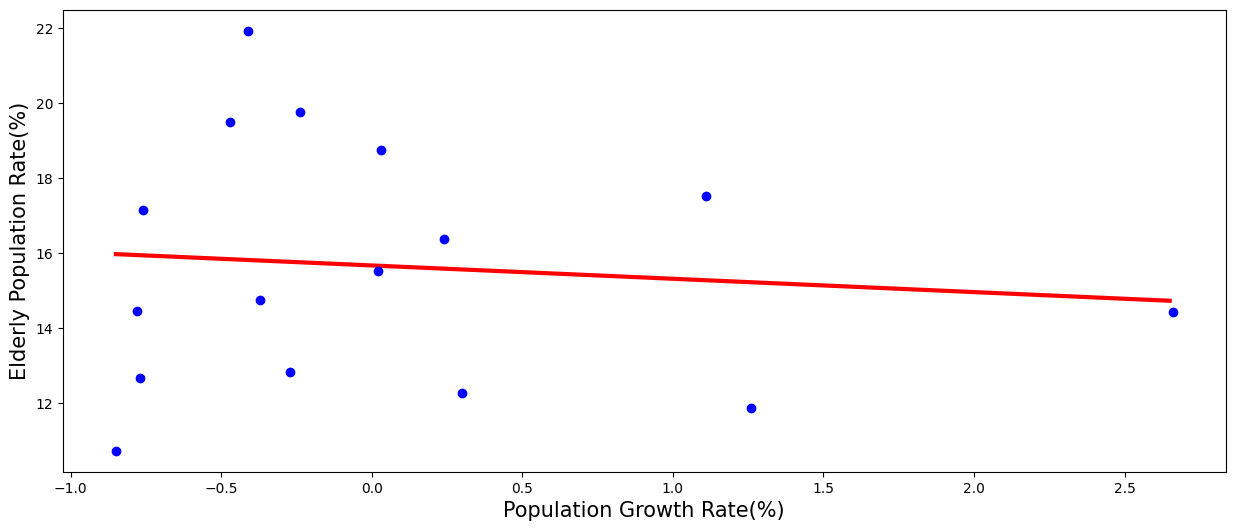

In [26]:
plt.rcParams['figure.figsize'] = (15, 6)
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그린다.
plt.plot(line_x, line_y, 'r-', linewidth=3)
plt.plot(X, y, 'bo')
plt.xlabel('Population Growth Rate(%)', size=15)
plt.ylabel('Elderly Population Rate(%)', size=15)
plt.show()